In [1]:
using DiffEqFlux, DifferentialEquations, Plots

In [11]:
u0 = Float32[2.0; 0.0]
datasize = 30
tspan = (0.0f0, 5.0f0)
tsteps = range(tspan[1], tspan[2], length = datasize)

function trueODEfunc(du, u, p, t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end

prob_trueode = ODEProblem(trueODEfunc, u0, tspan)
ode_data = Array(solve(prob_trueode, Tsit5(), saveat = tsteps))
ode_data = ode_data[1,:]

dudt2 = FastChain(FastDense(2, 16, tanh),
                  FastDense(16, 2))
prob_neuralode = NeuralODE(dudt2, tspan, Vern7(), saveat = tsteps, abstol=1e-6, reltol=1e-6)

function predict_neuralode(p)
  Array(prob_neuralode(u0, p))
end

function loss_neuralode(p)
    pred = predict_neuralode(p)
    loss = sum(abs2, (ode_data[1:size(pred,2)] .- pred[1,:]))
    return loss, pred
end

iter = 0
callback = function (p, l, pred; doplot = false)
  global iter
  iter += 1
  display(l)
  if doplot
    # plot current prediction against data
    plt = scatter(tsteps[1:size(pred,2)], ode_data[1:size(pred,2)], label = "data")
    scatter!(plt, tsteps[1:size(pred,2)], pred[1,:], label = "prediction")
    display(plot(plt))
  end

  return false
end

#14 (generic function with 1 method)

31.486969f0

24.83085f0

21.711708f0

19.488844f0

17.544733f0

15.747508f0

14.142773f0

12.828519f0

11.77626f0

10.725495f0

9.542112f0

8.371679f0

7.431589f0

6.7456527f0

6.0571213f0

5.2661834f0

4.6760845f0

4.265021f0

3.7242248f0

3.9426336f0

3.9512148f0

3.918346f0

3.2191832f0

3.254491f0

3.3626451f0

3.4156294f0

2.7851326f0

3.31713f0

2.6864183f0

2.8179555f0

2.86511f0

2.6544502f0

2.503758f0

2.5583327f0

2.541831f0

2.3655398f0

2.2579193f0

2.24177f0

2.1947386f0

2.0698378f0

1.9496304f0

1.920531f0

1.896446f0

1.7839022f0

1.7019724f0

1.6820159f0

1.6337533f0

1.5456467f0

1.4881653f0

1.4630852f0

1.401696f0

1.326549f0

1.2829981f0

1.2512426f0

1.2055452f0

1.1554416f0

1.1207364f0

1.0959873f0

1.0608045f0

1.0195087f0

0.9902319f0

0.9697361f0

0.9445182f0

0.9181055f0

0.90209496f0

0.88881975f0

0.8675438f0

0.8488254f0

0.8367031f0

0.8217926f0

0.8046607f0

0.79296625f0

0.78347707f0

0.7704652f0

0.758542f0

0.74974203f0

0.7392876f0

0.72713035f0

0.7175099f0

0.70874214f0

0.6980842f0

0.68866026f0

0.6809206f0

0.67189515f0

0.662946f0

0.65539503f0

0.64706546f0

0.6384901f0

0.63116527f0

0.6237076f0

0.6158968f0

0.60905874f0

0.6023311f0

0.59499186f0

0.5883248f0

0.5817527f0

0.57477355f0

0.5683545f0

0.5620633f0

0.55550003f0

0.54939866f0

0.543381f0

0.53715086f0

0.5312031f0

0.5253262f0

0.519399f0

0.51366264f0

0.5080732f0

0.50242287f0

0.49690247f0

0.49159935f0

0.48619327f0

0.48091796f0

0.475787f0

0.47050998f0

0.46546924f0

0.46058714f0

0.45558518f0

0.45085937f0

0.446026f0

0.4412709f0

0.43662018f0

0.431985f0

0.42741132f0

0.4228767f0

0.4184443f0

0.41401678f0

0.40975118f0

0.40535694f0

0.40127537f0

0.39692578f0

0.3927979f0

0.3887023f0

0.38467973f0

0.38062078f0

0.3766672f0

0.3726368f0

0.36884594f0

0.3648888f0

0.36116952f0

0.35736543f0

0.35349864f0

0.34984377f0

0.34612495f0

0.34233108f0

0.33881944f0

0.3350911f0

0.33154213f0

0.3280523f0

0.32466072f0

0.32118905f0

0.3176509f0

0.31426206f0

0.3110093f0

0.30788276f0

0.30341208f0

0.30141035f0

0.29773143f0

0.2945876f0

0.29145065f0

0.28824174f0

0.28514114f0

0.28205028f0

0.27880025f0

0.27554542f0

0.27245188f0

0.2697554f0

0.26685742f0

0.26274264f0

0.26051578f0

0.25765172f0

0.25475836f0

0.25185055f0

0.24870417f0

0.24620955f0

0.24332124f0

0.24051245f0

0.23796387f0

0.23519892f0

0.23221529f0

0.22935632f0

0.22695999f0

0.22417988f0

0.22164217f0

0.2188532f0

0.21633822f0

0.21370931f0

0.21126029f0

0.208486f0

0.20639545f0

0.2032654f0

0.20086518f0

0.19836849f0

0.19593005f0

0.19350418f0

0.19096257f0

0.1886758f0

0.18610783f0

0.18393202f0

0.18150625f0

0.17911482f0

0.17700557f0

0.17474517f0

0.17249043f0

0.17026873f0

0.16811474f0

0.16590601f0

0.16375504f0

0.16162607f0

0.15950684f0

0.15744083f0

0.15536878f0

0.15333453f0

0.15111221f0

0.14932913f0

0.14713877f0

0.14537579f0

0.14348005f0

0.139487f0

0.14027014f0

0.13794154f0

0.13468313f0

0.13421321f0

0.13045907f0

0.13132642f0

0.12886386f0

0.12775356f0

0.12499121f0

0.123704456f0

0.122320555f0

0.11988003f0

0.11821018f0

0.117115214f0

0.115677595f0

0.11401665f0

0.11246179f0

0.11011355f0

0.10902537f0

0.10444934f0

0.10694955f0

0.103058994f0

0.104083866f0

0.10181145f0

0.08763906f0

0.09797953f0

0.097830966f0

0.09710818f0

0.08766334f0

0.092753425f0

0.09594579f0

0.09151046f0

0.093193635f0

0.08932391f0

0.089119405f0

0.08760473f0

0.0854253f0

0.08557008f0

0.08165146f0

0.08324813f0

0.08126674f0

0.080367565f0

0.08001767f0

0.07448859f0

0.0765408f0

0.07472992f0

0.074458234f0

0.07296485f0

0.07173754f0

0.07184992f0

0.06968621f0

0.069331735f0

0.0665091f0

0.06886334f0

0.06565475f0

0.06460838f0

0.06375334f0

0.063383505f0

0.061009694f0

0.060817212f0

0.06036727f0

0.058878247f0

0.05815105f0

0.057278745f0

0.056515608f0

0.055817693f0

0.043349113f0

0.053879894f0

0.051844522f0

0.0521235f0

0.049491465f0

0.050296728f0

0.047482066f0

0.04823464f0

0.048139535f0

0.04710983f0

0.046646804f0

0.045532227f0

0.04495548f0

0.043674912f0

0.043203097f0

0.043203097f0

0.043203097f0

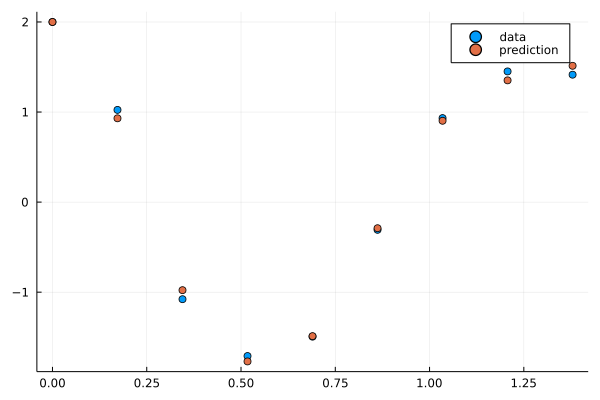

false

In [12]:
prob_neuralode = NeuralODE(dudt2, (0.0,1.5), Tsit5(), saveat = tsteps[tsteps .<= 1.5])
result_neuralode2 = DiffEqFlux.sciml_train(loss_neuralode, prob_neuralode.p,ADAM(0.05), cb = callback,maxiters = 300)
callback(result_neuralode2.u,loss_neuralode(result_neuralode2.u)...;doplot=true)

In [16]:
prob_neuralode = NeuralODE(dudt2, (0.0,3.0), Tsit5(), saveat = tsteps[tsteps .<= 3.0])
result_neuralode3 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode2.u,
                                           ADAM(0.05), maxiters = 500,
                                           cb = callback)
callback(result_neuralode3.u,loss_neuralode(result_neuralode3.u)...;doplot=true)

47.218895f0

14.3728285f0

13.611769f0

13.95418f0

14.103143f0

14.201145f0

14.296606f0

14.397501f0

14.4944935f0

14.572111f0

14.618231f0

14.630784f0

14.591901f0

14.503561f0

14.369841f0

14.201241f0

14.015371f0

13.832258f0

13.66551f0

13.503312f0

13.306093f0

13.034189f0

12.677775f0

12.270954f0

11.869268f0

11.51609f0

11.223433f0

10.975512f0

10.744572f0

10.50737f0

10.259453f0

10.027056f0

9.864935f0

9.797186f0

9.724826f0

9.5276375f0

9.262217f0

9.046607f0

8.8769455f0

8.661379f0

8.352896f0

8.019418f0

7.7616644f0

7.5380354f0

7.2377405f0

6.9394293f0

6.7296495f0

6.5336943f0

6.3017373f0

6.103024f0

5.9694357f0

5.8054695f0

5.621663f0

5.495205f0

5.3724866f0

5.2202177f0

5.1119967f0

5.008457f0

4.8683267f0

4.7675395f0

4.6543965f0

4.525566f0

4.430236f0

4.3082647f0

4.198248f0

4.096739f0

3.9824352f0

3.8961818f0

3.7923403f0

3.7102919f0

3.6267004f0

3.5476952f0

3.4804547f0

3.4045413f0

3.3430529f0

3.2732313f0

3.2132087f0

3.1451852f0

3.0819364f0

3.01874f0

2.9561214f0

2.8992238f0

2.8357258f0

2.77688f0

2.7194028f0

2.665845f0

2.6107106f0

2.558866f0

2.5050116f0

2.4587555f0

2.4098654f0

2.3651795f0

2.3255105f0

2.2795856f0

2.2390785f0

2.196094f0

2.1575284f0

2.114597f0

2.08141f0

2.047965f0

2.0011427f0

1.9737027f0

1.9370983f0

1.9055753f0

1.8739613f0

1.8368635f0

1.8123415f0

1.779263f0

1.7483168f0

1.7238827f0

1.6963012f0

1.6705465f0

1.6510882f0

1.6278262f0

1.6013275f0

1.573548f0

1.5507607f0

1.5296767f0

1.5097218f0

1.490657f0

1.4711919f0

1.4540966f0

1.4431815f0

1.4523706f0

1.5942068f0

2.5066247f0

6.3003983f0

3.7942827f0

11.003439f0

7.4976554f0

13.359319f0

14.823524f0

14.123461f0

11.272617f0

5.6802177f0

5.458547f0

8.652254f0

3.119473f0

6.437825f0

7.6880302f0

6.290012f0

3.0541158f0

3.137895f0

5.708873f0

2.0217204f0

3.4413285f0

4.5568824f0

3.6935456f0

2.1134048f0

3.1114082f0

3.453015f0

2.024571f0

2.5393357f0

3.0748498f0

2.563319f0

1.9470327f0

2.518095f0

2.5682914f0

1.9477466f0

2.1730702f0

2.4283564f0

2.110797f0

1.8495f0

2.138819f0

2.0682855f0

1.7769115f0

1.9076105f0

2.0038538f0

1.8020171f0

1.7413334f0

1.8945994f0

1.7804974f0

1.6822572f0

1.7878726f0

1.748825f0

1.6329134f0

1.6704526f0

1.6900805f0

1.5926933f0

1.6019591f0

1.6140144f0

1.5550984f0

1.5307568f0

1.5510507f0

1.5095851f0

1.4759619f0

1.4984624f0

1.4655104f0

1.43175f0

1.4488515f0

1.4172399f0

1.3962936f0

1.4009824f0

1.3778565f0

1.3600117f0

1.3665907f0

1.3364505f0

1.33072f0

1.3229265f0

1.3031808f0

1.2990458f0

1.2913681f0

1.2739742f0

1.2707603f0

1.2593913f0

1.2483943f0

1.2435156f0

1.2307659f0

1.2241393f0

1.2175503f0

1.2071984f0

1.203845f0

1.1933179f0

1.1862279f0

1.1823716f0

1.1731282f0

1.1699835f0

1.1604577f0

1.1563213f0

1.1492416f0

1.1416287f0

1.1389706f0

1.1309226f0

1.1278316f0

1.1231499f0

1.1156995f0

1.1119843f0

1.1070913f0

1.1015811f0

1.0972309f0

1.0928473f0

1.088116f0

1.0847466f0

1.0799947f0

1.0762024f0

1.0718242f0

1.0686733f0

1.0640535f0

1.0606021f0

1.0567136f0

1.0536132f0

1.0495771f0

1.0467032f0

1.0560931f0

1.0619166f0

1.0359845f0

1.0480456f0

1.0299835f0

1.0344319f0

1.0239717f0

1.0233879f0

1.0175303f0

1.0163729f0

1.0122355f0

1.0125095f0

1.0133872f0

1.0038683f0

1.0014135f0

0.99804497f0

0.9955805f0

0.9932904f0

0.99191946f0

0.99307305f0

0.98599553f0

0.9849951f0

0.9809576f0

0.9822946f0

0.9765031f0

0.9822154f0

0.98597705f0

0.9691637f0

0.9810537f0

0.98130894f0

0.9640765f0

0.9957414f0

0.98451835f0

0.95787853f0

1.0002024f0

0.9938148f0

0.9507401f0

1.0028036f0

1.0079184f0

0.9450555f0

0.98798317f0

0.9775302f0

0.9425367f0

0.96178585f0

0.9425928f0

0.93751836f0

0.95182955f0

0.9424529f0

0.92954993f0

0.93525356f0

0.93164957f0

0.92503095f0

0.9461303f0

0.957857f0

0.9215419f0

0.9338593f0

0.973935f0

0.9546876f0

0.9238269f0

0.912326f0

0.9295656f0

0.93216103f0

0.9096158f0

0.91332245f0

0.9373791f0

0.91894674f0

0.9022159f0

0.8994155f0

0.90027905f0

0.89983934f0

0.8965073f0

0.89371943f0

0.8923904f0

0.89354354f0

0.894948f0

0.8960672f0

0.8985686f0

0.9077264f0

0.90182936f0

0.8849337f0

0.88622737f0

0.896487f0

0.8953848f0

0.8857614f0

0.8778515f0

0.877018f0

0.8883374f0

0.9056228f0

0.9075124f0

0.91072917f0

0.89463234f0

0.8785901f0

0.8698048f0

0.8709113f0

0.8750217f0

0.8721074f0

0.8627962f0

0.86184025f0

0.8675216f0

0.8727645f0

0.89004064f0

0.9157034f0

0.9471447f0

0.90742254f0

0.88283265f0

0.8640445f0

0.8527362f0

0.85567266f0

0.90015984f0

1.0023651f0

1.124109f0

1.6521885f0

1.719396f0

2.5691233f0

0.87619317f0

1.9684002f0

3.4255729f0

1.8037913f0

4.3216105f0

1.3614616f0

2.7114005f0

1.288347f0

2.007194f0

1.6316149f0

1.2444911f0

1.8176606f0

1.4408934f0

1.0244229f0

1.5416366f0

1.2592361f0

1.0258743f0

1.3379292f0

1.3100024f0

1.042634f0

1.1521173f0

1.2450545f0

1.0495096f0

1.049202f0

1.1664721f0

1.1328622f0

1.0316145f0

1.0679536f0

1.0787402f0

1.0065123f0

0.9678046f0

1.0160159f0

1.0084008f0

0.953194f0

0.9707886f0

0.9901829f0

0.93796587f0

0.9251586f0

0.9496434f0

0.92640114f0

0.90547377f0

0.9273603f0

0.91706026f0

0.8885913f0

0.8995605f0

0.89248097f0

0.8703915f0

0.87349147f0

0.876986f0

0.860188f0

0.86233073f0

0.85804474f0

0.85287833f0

0.8478502f0

0.8525827f0

0.845796f0

0.84177804f0

0.84572434f0

0.8373922f0

0.83534986f0

0.8336251f0

0.8289608f0

0.8289999f0

0.8281491f0

0.82611525f0

0.8223033f0

0.82166004f0

0.8176156f0

0.8180668f0

0.8180879f0

0.8161614f0

0.8121227f0

0.81178f0

0.80934966f0

0.806993f0

0.81101286f0

0.804523f0

0.80612934f0

0.8017419f0

0.8038019f0

0.80468196f0

0.80385184f0

0.79799026f0

0.79662716f0

0.79764897f0

0.796098f0

0.7951169f0

0.79254323f0

0.7923025f0

0.7910813f0

0.7910436f0

0.7901211f0

0.7902564f0

0.78810024f0

0.78752244f0

0.78769106f0

0.7848103f0

0.7859384f0

0.7840593f0

0.7849494f0

0.7841623f0

0.782665f0

0.78047895f0

0.78086495f0

0.7803397f0

0.7783826f0

0.77755195f0

0.7757521f0

0.7743418f0

0.7763499f0

0.773729f0

0.7761644f0

0.7781756f0

0.7719958f0

0.77517253f0

0.77111876f0

0.7720735f0

0.7699726f0

0.76970214f0

0.7736144f0

0.7736081f0

0.7690567f0

0.77868015f0

0.7650688f0

0.7670495f0

0.7665257f0

0.76735616f0

0.76852113f0

0.7617616f0

0.762139f0

0.76079965f0

0.76080817f0

0.7597463f0

0.7578883f0

0.7604828f0

0.7575388f0

0.75713646f0

0.7579504f0

0.76465464f0

0.7557707f0

0.76263493f0

0.7550913f0

0.7562529f0

0.7550913f0

u: 82-element Vector{Float32}:
 -2.3716722
  0.75177443
  0.19306128
  0.5387715
 -0.23484395
 -0.99222887
  1.3338939
 -1.8838773
  0.3433674
 -0.5496362
 -0.3157204
 -1.1374983
  0.8930027
  ⋮
 -1.2311331
 -0.34927967
  1.6706814
  0.4033215
 -2.6462228
  0.5338283
  0.52543426
  0.01789529
  0.50313425
  0.12722082
 -0.9957218
 -1.5889003

30.589151f0

29.693453f0

28.845497f0

28.001045f0

27.172434f0

26.403284f0

25.60443f0

24.784628f0

23.96307f0

23.106815f0

22.17067f0

21.095613f0

19.794106f0

18.048552f0

15.394844f0

11.714435f0

10.324822f0

11.712976f0

12.785425f0

13.0303955f0

12.648085f0

11.979564f0

11.320042f0

10.798544f0

10.478183f0

10.382721f0

10.427809f0

10.44717f0

10.315587f0

10.067998f0

9.780696f0

9.695203f0

9.776064f0

9.8246975f0

9.664058f0

9.336995f0

8.982561f0

8.677792f0

8.449284f0

8.282993f0

8.116202f0

7.8985333f0

7.6361175f0

7.376658f0

7.160555f0

6.963466f0

6.6577115f0

6.411666f0

6.2003503f0

6.0624733f0

5.902055f0

5.7997203f0

5.627668f0

5.464343f0

5.3346434f0

5.4276733f0

5.506316f0

5.051076f0

5.094704f0

4.9679813f0

4.698098f0

5.132434f0

4.5900564f0

4.5552983f0

4.71793f0

4.329709f0

4.393178f0

4.3353496f0

4.1499333f0

4.2141705f0

4.0072355f0

4.0117993f0

4.022067f0

3.889917f0

3.9462552f0

3.7761307f0

4.038073f0

3.7090511f0

3.9401233f0

3.7022521f0

3.637032f0

3.7924078f0

3.5412517f0

3.9034748f0

3.5077813f0

3.628795f0

3.444424f0

3.5027728f0

3.435751f0

3.3956342f0

3.410039f0

3.3229682f0

3.3307023f0

3.27047f0

3.2879972f0

3.229935f0

3.2473977f0

3.1865728f0

3.2178054f0

3.1506433f0

3.1541493f0

3.1155615f0

3.241684f0

3.1033597f0

3.0745738f0

3.3767507f0

4.6763186f0

3.7758627f0

3.7528281f0

3.5381017f0

3.2814827f0

3.755197f0

3.1296678f0

3.3860075f0

3.5872626f0

3.3473134f0

3.101757f0

3.4120026f0

3.1266065f0

3.0481348f0

3.2353683f0

2.898079f0

3.144674f0

2.9421575f0

3.0083165f0

3.2141266f0

3.50638f0

3.459413f0

2.8698134f0

4.0405183f0

3.2452939f0

3.8912902f0

3.022169f0

3.321604f0

3.315921f0

2.8541124f0

3.366859f0

3.0640042f0

2.8632486f0

3.2279334f0

2.925868f0

2.8734288f0

3.0826554f0

2.8250165f0

2.8404942f0

2.9284885f0

2.687656f0

2.8317003f0

2.7312708f0

2.666825f0

2.75098f0

2.5977674f0

2.6994786f0

2.595602f0

2.6285138f0

2.587683f0

2.5518436f0

2.60879f0

2.5067673f0

2.6189294f0

2.4938946f0

2.541966f0

2.4460673f0

2.5050402f0

2.4159265f0

2.4505482f0

2.3841348f0

2.3816476f0

2.3764253f0

2.3769007f0

2.3297546f0

2.3194156f0

2.322655f0

2.2911155f0

2.2885609f0

2.2591066f0

2.25178f0

2.2262259f0

2.216114f0

2.1936367f0

2.1868353f0

2.1611896f0

2.1577127f0

2.1389408f0

2.1466541f0

2.1073358f0

2.089877f0

2.072539f0

2.0631835f0

2.0435767f0

2.027625f0

2.008203f0

1.9993709f0

1.9785156f0

1.9664296f0

1.9562731f0

1.9451178f0

1.933311f0

1.9244293f0

1.9091802f0

1.894878f0

1.9013503f0

1.8845611f0

1.8563179f0

1.8386104f0

1.8360331f0

1.8213074f0

1.8108134f0

1.7946203f0

1.7739669f0

1.7840405f0

1.752618f0

1.7692298f0

1.7346812f0

1.7292897f0

1.7123761f0

1.7088883f0

1.6939193f0

1.697878f0

1.6722071f0

1.6755002f0

1.6680449f0

1.6526587f0

1.6501801f0

1.6366547f0

1.6376194f0

1.6295882f0

1.6145134f0

1.6049647f0

1.5964657f0

1.5872617f0

1.5818202f0

1.57056f0

1.567183f0

1.5700938f0

1.5640707f0

1.5466231f0

1.5530684f0

1.5340905f0

1.5357577f0

1.523528f0

1.5273286f0

1.5097967f0

1.5144362f0

1.4998785f0

1.5003284f0

1.4879471f0

1.4888271f0

1.4801167f0

1.4724927f0

1.4651557f0

1.4662871f0

1.4579046f0

1.4493982f0

1.447469f0

1.4443208f0

1.4370892f0

1.428251f0

1.4292572f0

1.4212577f0

1.4162775f0

1.4113344f0

1.4134127f0

1.4003713f0

1.3939455f0

1.3914315f0

1.3868268f0

1.3842005f0

1.380404f0

1.3682323f0

1.3674185f0

1.3626715f0

1.359339f0

1.3528999f0

1.3529745f0

1.3474282f0

1.345238f0

1.3373615f0

1.3320524f0

1.3264551f0

1.3271115f0

1.3221245f0

1.319026f0

1.3212974f0

1.3159372f0

1.3085445f0

1.3128437f0

1.297633f0

1.2994938f0

1.3023607f0

1.2860209f0

1.283677f0

1.2801497f0

1.2748505f0

1.2720426f0

1.2809597f0

1.2656503f0

1.2641505f0

1.2611036f0

1.2545694f0

1.25871f0

1.2438043f0

1.2631369f0

1.2458671f0

1.2436702f0

1.251814f0

1.2275679f0

1.2662433f0

1.3006059f0

1.2179818f0

1.2653866f0

1.2226354f0

1.2491889f0

1.2747475f0

1.2005343f0

1.2376511f0

1.2024536f0

1.2213117f0

1.2844659f0

1.1838901f0

1.2542274f0

1.2047787f0

1.199267f0

1.2283839f0

1.1678114f0

1.2025745f0

1.1635305f0

1.1882677f0

1.1731663f0

1.1574593f0

1.1637852f0

1.146191f0

1.147852f0

1.1412449f0

1.1542131f0

1.1366464f0

1.1371356f0

1.1321151f0

1.1275005f0

1.131123f0

1.1179894f0

1.1283281f0

1.1199536f0

1.1101477f0

1.1089902f0

1.1070199f0

1.1070377f0

1.100526f0

1.1038564f0

1.0984346f0

1.0905056f0

1.0936575f0

1.0852871f0

1.0937166f0

1.0921772f0

1.0793072f0

1.0985258f0

1.0792725f0

1.0804666f0

1.0833402f0

1.0649779f0

1.0728635f0

1.0650232f0

1.066878f0

1.0733342f0

1.0538517f0

1.0614889f0

1.0560111f0

1.0465646f0

1.0525244f0

1.0428965f0

1.0396556f0

1.0399562f0

1.0346051f0

1.0350059f0

1.0379653f0

1.0318139f0

1.0254961f0

1.0324168f0

1.0207347f0

1.0259384f0

1.0326524f0

1.0129415f0

1.025329f0

1.0185385f0

1.0071851f0

1.0130305f0

1.004366f0

1.0082654f0

1.011948f0

0.9971849f0

0.9982498f0

0.99558705f0

0.99316686f0

1.001942f0

0.9857739f0

0.9874748f0

0.9892869f0

0.9782363f0

0.97942185f0

0.97751385f0

0.9725471f0

0.98280567f0

0.99599296f0

0.97442335f0

0.96474975f0

0.9660164f0

0.9610098f0

0.9638654f0

0.98774654f0

0.96888614f0

0.9536808f0

0.9587915f0

0.9589812f0

0.95063597f0

0.9751016f0

0.9764217f0

0.9473518f0

0.94387037f0

0.96131146f0

0.94171154f0

0.9484947f0

0.95339173f0

0.93855774f0

0.98673177f0

0.95178294f0

0.92983407f0

0.9719541f0

0.9655257f0

0.92198956f0

0.9333475f0

0.9326155f0

0.9186486f0

0.91895175f0

0.92429227f0

0.9161944f0

0.91389334f0

0.9154142f0

0.9104955f0

0.9069181f0

0.92314464f0

0.91560346f0

0.9048104f0

0.9614123f0

0.95535016f0

0.89849275f0

0.93165094f0

0.94663084f0

0.89919746f0

0.903658f0

0.91917336f0

0.89130414f0

0.8985035f0

0.92146534f0

0.9126364f0

0.8872484f0

0.8816476f0

0.8908614f0

0.89273167f0

0.88218683f0

0.8759129f0

0.8766346f0

0.8862748f0

0.8871008f0

0.872467f0

0.8706552f0

0.8771345f0

0.8676707f0

0.8643152f0

0.86951965f0

0.8660446f0

0.8593177f0

0.86112356f0

0.8639163f0

0.8584724f0

0.853814f0

0.85802495f0

0.8598938f0

0.8550125f0

0.8497795f0

0.8471307f0

0.8457439f0

0.84449565f0

0.8428057f0

0.84170836f0

0.84079736f0

0.8387317f0

0.8384657f0

0.8405477f0

0.83850265f0

0.8342812f0

0.83406067f0

0.8357918f0

0.83450323f0

0.8295873f0

0.82748336f0

0.82885015f0

0.8271678f0

0.8253789f0

0.82711345f0

0.8253789f0

0.8253789f0

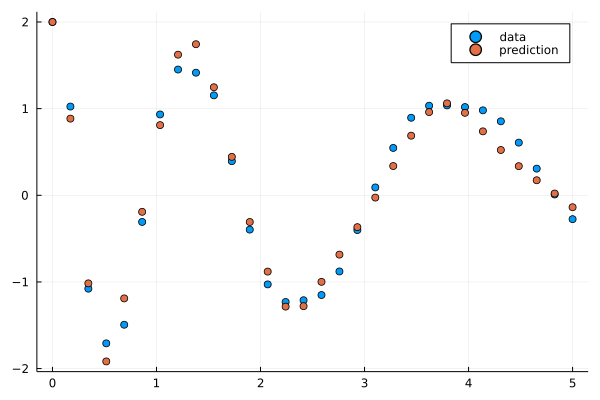

false

In [17]:
prob_neuralode = NeuralODE(dudt2, (0.0,5.0), Tsit5(), saveat = tsteps)

result_neuralode4 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode3.u,
                                           ADAM(0.01), maxiters = 500,
                                           cb = callback)
callback(result_neuralode4.u,loss_neuralode(result_neuralode4.u)...;doplot=true)